In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Set1")
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
spotify= pd.read_csv('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv', encoding='latin-1')
spotify.head(5)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


# **Data Exploration**

In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [4]:
spotify.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [5]:
spotify.duplicated().sum()

2

In [6]:
spotify.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

# **Data Cleaning**

In [7]:
spotify.duplicated().sum()

2

**I will analyze the year 2024 so I will not need the rest of the years**

**convert to Year**


In [8]:
spotify['Year'] = pd.to_datetime(spotify['Release Date']).dt.year
spotify['Month'] = pd.to_datetime(spotify['Release Date']).dt.month_name()
spotify=spotify[spotify['Year'] == 2024] # Data for 2024 only

In [9]:
spotify.isnull().sum()

Track                           0
Album Name                      0
Artist                          5
Release Date                    0
ISRC                            0
All Time Rank                   0
Track Score                     0
Spotify Streams                24
Spotify Playlist Count         21
Spotify Playlist Reach         22
Spotify Popularity            323
YouTube Views                 126
YouTube Likes                 126
TikTok Posts                  597
TikTok Likes                  505
TikTok Views                  505
YouTube Playlist Reach        308
Apple Music Playlist Count    109
AirPlay Spins                 153
SiriusXM Spins                469
Deezer Playlist Count         205
Deezer Playlist Reach         205
Amazon Playlist Count         203
Pandora Streams               240
Pandora Track Stations        269
Soundcloud Streams            478
Shazam Counts                 126
TIDAL Popularity              693
Explicit Track                  0
Year          

In [10]:
spotify = spotify.drop([ 'ISRC','YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'
             ],axis='columns')
              
spotify.head(2)

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year,Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,"390,470,936","30,716","196,631,588",92.0,2024,April
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","28,113","174,597,137",92.0,2024,May


In [11]:
spotify['Spotify Popularity'].fillna(method='ffill', inplace=True)

In [12]:
spotify.isnull().sum()

Track                      0
Album Name                 0
Artist                     5
Release Date               0
All Time Rank              0
Track Score                0
Spotify Streams           24
Spotify Playlist Count    21
Spotify Playlist Reach    22
Spotify Popularity         0
Year                       0
Month                      0
dtype: int64

In [13]:
artists_with_nan = spotify[spotify['Artist'].isna()]
artists_with_nan

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year,Month
311,Cool,JnD Mix,NaN,5/25/2024,311,86.5,NaN,NaN,NaN,84.0,2024,May
480,I Wanna Party,I Wanna Party - Single,NaN,5/31/2024,482,70.3,NaN,NaN,NaN,84.0,2024,May
1345,Marlboro Remix,Marlboro Remix - Single,NaN,6/7/2024,"1,343",40.6,NaN,NaN,NaN,77.0,2024,June
1561,Melting,Melting - Single,NaN,6/10/2024,"1,553",37.2,NaN,NaN,NaN,77.0,2024,June
3402,La ï¿½ï¿½ltima Vez (Yo Te Per,La ï¿½ï¿½ltima Vez (Yo Te Perdï¿½ï¿½),NaN,5/2/2024,"3,381",23.6,NaN,NaN,NaN,67.0,2024,May


In [14]:
spotify[spotify['Album Name']== 'JnD Mix']

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year,Month
311,Cool,JnD Mix,NaN,5/25/2024,311,86.5,NaN,NaN,NaN,84.0,2024,May


In [15]:
spotify.dropna(subset=['Artist'], inplace=True)

In [16]:
spotify.isnull().sum()

Track                      0
Album Name                 0
Artist                     0
Release Date               0
All Time Rank              0
Track Score                0
Spotify Streams           19
Spotify Playlist Count    16
Spotify Playlist Reach    17
Spotify Popularity         0
Year                       0
Month                      0
dtype: int64

**Convert Object to float**

In [17]:
spotify['Spotify Streams'] = pd.to_numeric(spotify['Spotify Streams'].str.replace(',', ''), errors='coerce')
spotify['Spotify Playlist Count'] = pd.to_numeric(spotify['Spotify Playlist Count'].str.replace(',', ''), errors='coerce')
spotify['Spotify Playlist Reach'] = pd.to_numeric(spotify['Spotify Playlist Reach'].str.replace(',', ''), errors='coerce')

In [18]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 4594
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   688 non-null    object 
 1   Album Name              688 non-null    object 
 2   Artist                  688 non-null    object 
 3   Release Date            688 non-null    object 
 4   All Time Rank           688 non-null    object 
 5   Track Score             688 non-null    float64
 6   Spotify Streams         669 non-null    float64
 7   Spotify Playlist Count  672 non-null    float64
 8   Spotify Playlist Reach  671 non-null    float64
 9   Spotify Popularity      688 non-null    float64
 10  Year                    688 non-null    int32  
 11  Month                   688 non-null    object 
dtypes: float64(5), int32(1), object(6)
memory usage: 67.2+ KB


In [19]:
artists_with_nan_streams = spotify[spotify['Spotify Streams'].isna()]
artists_with_nan_streams.head(19)

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year,Month
24,Future,Future,official sound studio,1/10/2024,25,277.5,NaN,1.0,2.0,86.0,2024,January
57,Dona Felicidade,Dona Felicidade,Patati Patatï¿,6/4/2024,58,190.0,NaN,2.0,41206.0,86.0,2024,June
60,Stereo Love - Melodic,Stereo Love Deluxe (feat. Vika Jigulina),Edward Maya,6/5/2024,61,187.9,NaN,2.0,135.0,9.0,2024,June
117,Chegou a Hora de Ir para Cama (Playback),3 Palavrinhas Vol.9 (Playback),3 Palavrinhas,6/4/2024,118,142.4,NaN,NaN,NaN,87.0,2024,June
141,Jedag Jedug Capcut 2024,Jedag Jedug Capcut 2024,Afrian Af,1/5/2024,142,127.4,NaN,1.0,47.0,74.0,2024,January
316,Pretty Green Eyes (Sunset Ibiza Mix),Pretty Green Eyes (Sunset Ibiza Mix),KETTAMA,6/14/2024,316,85.9,NaN,5.0,3277306.0,80.0,2024,June
391,The Girl From Ipanema,Instrumental Bossa Nova,Stan Getz,6/6/2024,391,77.2,NaN,NaN,NaN,84.0,2024,June
539,Cuando Te Amï¿,Cuando Te Amï¿½ï¿½ - Si,Cupula Roja,6/8/2024,537,66.3,NaN,NaN,NaN,82.0,2024,June
758,Swalla (feat. Nicki Minaj & Ty Dolla $ign),Nu King,Jason Derulo,2/16/2024,755,55.9,NaN,NaN,NaN,80.0,2024,February
1325,Take You Dancing,Nu King,Jason Derulo,2/16/2024,"1,317",41.0,NaN,NaN,NaN,77.0,2024,February


In [20]:
spotify[spotify['Artist']=='LuckReaper']

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year,Month
4431,Oye,Oye,LuckReaper,5/15/2024,"4,879",19.9,47151307.0,NaN,NaN,59.0,2024,May


In [21]:
artists_with_nan_streams = spotify[spotify['Spotify Playlist Count'].isna()]
artists_with_nan_streams.head(16)

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year,Month
30,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýý...,LOVE BGM JPN,5/14/2024,31,249.8,1.645079e+09,NaN,NaN,87.0,2024,May
117,Chegou a Hora de Ir para Cama (Playback),3 Palavrinhas Vol.9 (Playback),3 Palavrinhas,6/4/2024,118,142.4,NaN,NaN,NaN,87.0,2024,June
391,The Girl From Ipanema,Instrumental Bossa Nova,Stan Getz,6/6/2024,391,77.2,NaN,NaN,NaN,84.0,2024,June
539,Cuando Te Amï¿,Cuando Te Amï¿½ï¿½ - Si,Cupula Roja,6/8/2024,537,66.3,NaN,NaN,NaN,82.0,2024,June
758,Swalla (feat. Nicki Minaj & Ty Dolla $ign),Nu King,Jason Derulo,2/16/2024,755,55.9,NaN,NaN,NaN,80.0,2024,February
1325,Take You Dancing,Nu King,Jason Derulo,2/16/2024,"1,317",41.0,NaN,NaN,NaN,77.0,2024,February
1361,one of wun,One of Wun,Gunna,5/10/2024,"1,356",40.3,NaN,NaN,NaN,72.0,2024,May
1648,Sarï¿½ï¿½ Perchï¿½ï¿,Viva Italia,Esteriore Brothers,6/7/2024,"1,638",36.1,NaN,NaN,NaN,18.0,2024,June
2383,ýýýý ýýýý ýýýýýýýý,ýýýý ýýýý ýýýýýýýý - Single,ýýýýýýýý ýýýýýýýýýýýý,5/2/2024,"2,374",29.3,NaN,NaN,NaN,67.0,2024,May
2912,Funk Estranho,Funk Estranho - Single,prod.67,5/31/2024,"2,902",25.9,3.589000e+03,NaN,NaN,15.0,2024,May


In [22]:
spotify.isnull().sum()

Track                      0
Album Name                 0
Artist                     0
Release Date               0
All Time Rank              0
Track Score                0
Spotify Streams           19
Spotify Playlist Count    16
Spotify Playlist Reach    17
Spotify Popularity         0
Year                       0
Month                      0
dtype: int64

**convert to int**

In [23]:
spotify['Spotify Streams'] =spotify['Spotify Streams'].fillna(0).astype(int)
spotify['Spotify Playlist Count'] =spotify['Spotify Playlist Count'].fillna(0).astype(int)
spotify['Spotify Playlist Reach'] =spotify['Spotify Playlist Reach'].fillna(0).astype(int)

# **Data Preprocessing & Data Visualisation**

In [24]:
artist_track_counts = (spotify.groupby('Artist')['Track'].count().reset_index(name='Track').sort_values(by='Track', ascending=False).head(10))
artist_track_counts=artist_track_counts.reset_index(drop=True)
print("Artist with the Most Tracks:")
artist_track_counts

Artist with the Most Tracks:


,Artist,Track
0,Taylor Swift,24
1,Future,15
2,Linkin Park,11
3,Billie Eilish,10
4,21 Savage,10
5,Ariana Grande,7
6,Selena,7
7,Gunna,6
8,Beyoncï¿,5
9,Kanye West,5


Taylor Swift: 24 tracks


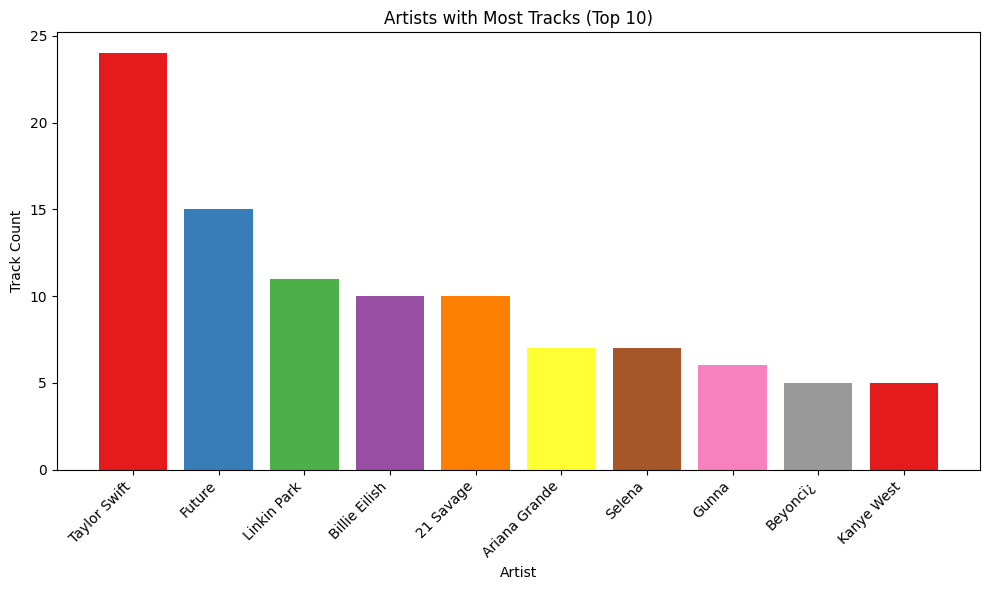

In [25]:
most_tracks_artist = artist_track_counts.iloc[0]['Artist']
most_tracks_count = artist_track_counts.iloc[0]['Track']
plt.figure(figsize=(10, 6)) 
plt.bar(artist_track_counts['Artist'], artist_track_counts['Track'], color=palette )
plt.xlabel('Artist')
plt.ylabel('Track Count')
plt.title('Artists with Most Tracks (Top 10)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
print(f"{most_tracks_artist}: {most_tracks_count} tracks")

In [26]:
album_most_track = (spotify.groupby(['Artist','Album Name'])['Track'].count().reset_index(name='Track').sort_values(by='Track', ascending=False).head(10))
album_most_track=album_most_track.reset_index(drop=True)
print("Album with the Most Tracks:")
album_most_track

Album with the Most Tracks:


,Artist,Album Name,Track
0,Taylor Swift,THE TORTURED POETS DEPARTMENT,18
1,Future,WE DON'T TRUST YOU,11
2,Billie Eilish,HIT ME HARD AND SOFT,10
3,Linkin Park,Papercuts,10
4,Selena,Amor Prohibido (Remasterizado 2024/30th Annive...,7
5,Taylor Swift,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,6
6,Ariana Grande,eternal sunshine,5
7,21 Savage,american dream,5
8,Future,WE STILL DON'T TRUST YOU,4
9,Kanye West,VULTURES 1,4


The Album have Most Track THE TORTURED POETS DEPARTMENT for Taylor Swift have 18 track


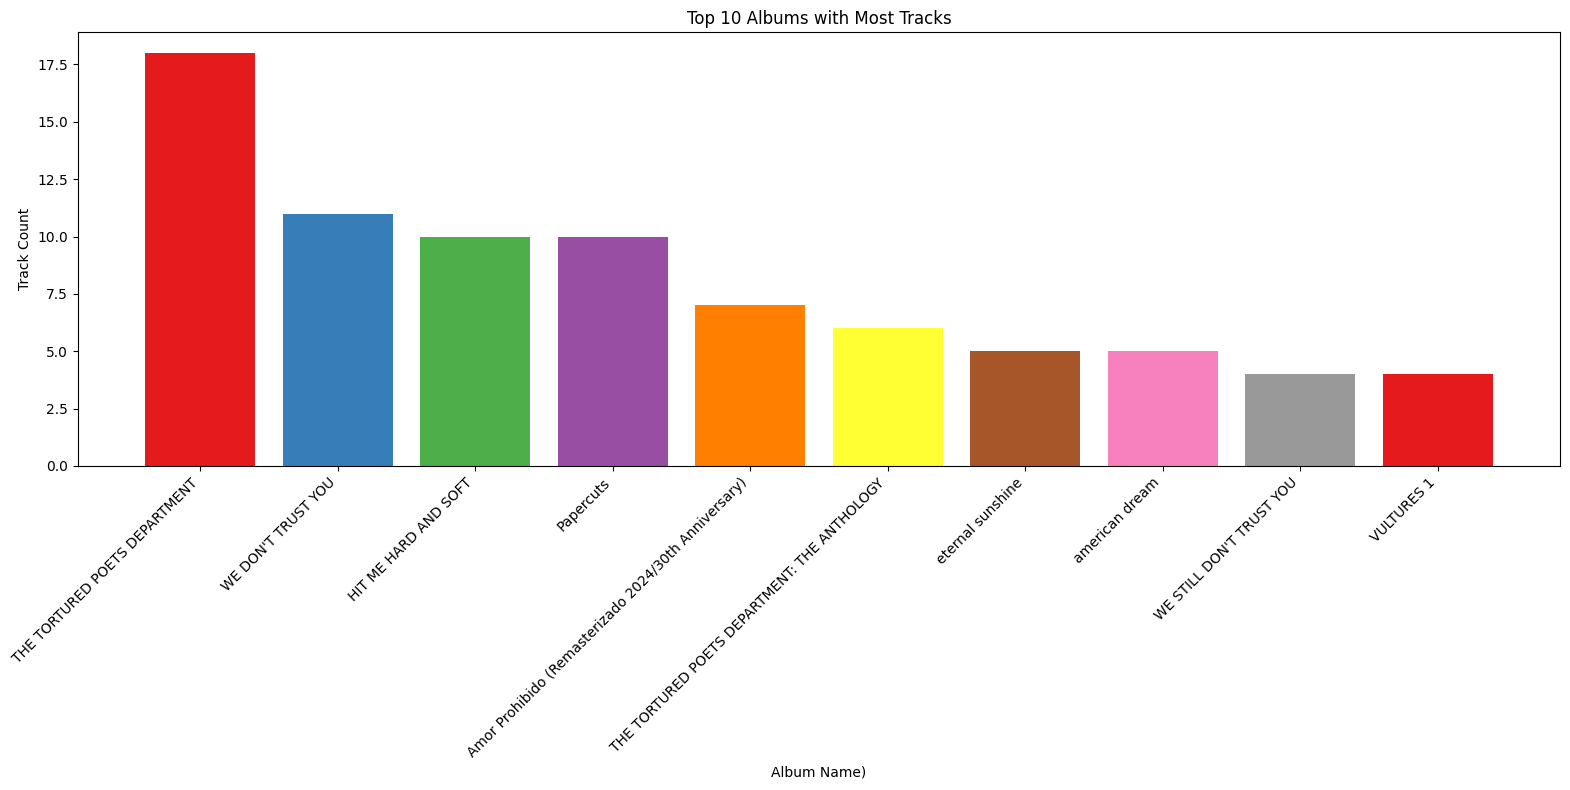

In [27]:
plt.figure(figsize=(16, 8)) 
plt.bar(album_most_track['Album Name'],album_most_track['Track'], color=palette)
plt.xlabel('Album Name)')  
plt.ylabel('Track Count')
plt.title('Top 10 Albums with Most Tracks')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
print('The Album have Most Track',album_most_track['Album Name'][0],'for',album_most_track['Artist'][0],'have',album_most_track['Track'][0],'track')

In [28]:
artist_album_counts = (
    spotify.groupby('Artist')['Album Name'].nunique()  
    .reset_index(name='Album Count')
    .sort_values(by='Album Count', ascending=False)
    .reset_index(drop=True)  
).head(10)

In [29]:
artist_album_counts

,Artist,Album Count
0,21 Savage,6
1,FloyyMenor,4
2,MUSIC LAB JPN,4
3,Bizarrap,3
4,Don Toliver,3
5,Dua Lipa,3
6,Kendrick Lamar,3
7,$uicideboy$,3
8,Shubh,3
9,Central Cee,3


In [30]:
spotify[spotify['Artist']=='21 Savage']

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year,Month
86,redrum,american dream,21 Savage,1/12/2024,87,164.8,428233003,57311,144298748,90.0,2024,January
656,nï¿½ï¿½e,nï¿½ï¿½e,21 Savage,1/10/2024,652,59.4,150203467,33551,52062674,81.0,2024,January
1287,all of me,american dream,21 Savage,1/12/2024,"1,283",41.6,87111207,20380,29657028,76.0,2024,January
1386,prove it,prove it,21 Savage,1/10/2024,"1,388",39.8,88224186,19035,10935183,78.0,2024,January
2457,n.h.i.e.,n.h.i.e.,21 Savage,1/10/2024,"2,459",28.8,102829758,16786,13717188,75.0,2024,January
3007,sneaky,american dream,21 Savage,1/12/2024,"3,005",25.4,54062895,14363,8542239,71.0,2024,January
3205,should've wore a bonnet,should've wore a bonnet,21 Savage,1/10/2024,"3,200",24.4,51365907,12559,6817443,8.0,2024,January
3407,dangerous,dangerous,21 Savage,1/10/2024,"3,407",23.5,47098347,15845,17899427,67.0,2024,January
4301,redrum,american dream,21 Savage,1/12/2024,"4,257",20.4,428233003,2814,926379,67.0,2024,January
4453,red sky,american dream,21 Savage,1/12/2024,"4,450",19.8,38445811,12924,1883136,11.0,2024,January


**This indicates that any single song released by any artist is classified by the Spotify platform as an album, and this is what happened because 21 Savage has an album consisting of 5 songs and the rest are single songs.**

In [31]:
album_most_streams = (spotify.groupby(['Artist','Album Name','Month'])['Spotify Streams'].sum().reset_index(name='Spotify Streams').sort_values(by='Spotify Streams', ascending=False).head(10))
album_most_streams=album_most_streams.reset_index(drop=True)
print("Album with the Most Streams:")
album_most_streams

Album with the Most Streams:


,Artist,Album Name,Month,Spotify Streams
0,Linkin Park,Papercuts,April,6167890522
1,Taylor Swift,THE TORTURED POETS DEPARTMENT,April,3058241238
2,MUSIC LAB JPN,YOUGAKU MORIMORI CLUB MEDLEY,April,1655575417
3,MUSIC LAB JPN,GEKIATU BEST AGE SONG - CLUB SONG,May,1655575417
4,MUSIC LAB JPN,CLUB DE YOKUKIKU YOUGAKU MEDLEY,May,1655575417
5,MUSIC LAB JPN,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,June,1653018119
6,LOVE BGM JPN,ýýýýýýýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýý...,May,1645079292
7,Sabrina Carpenter,Espresso,April,1621855787
8,DJ Laxman,Calm Down Baby - Single,January,1389772733
9,Future,WE DON'T TRUST YOU,March,1327243308


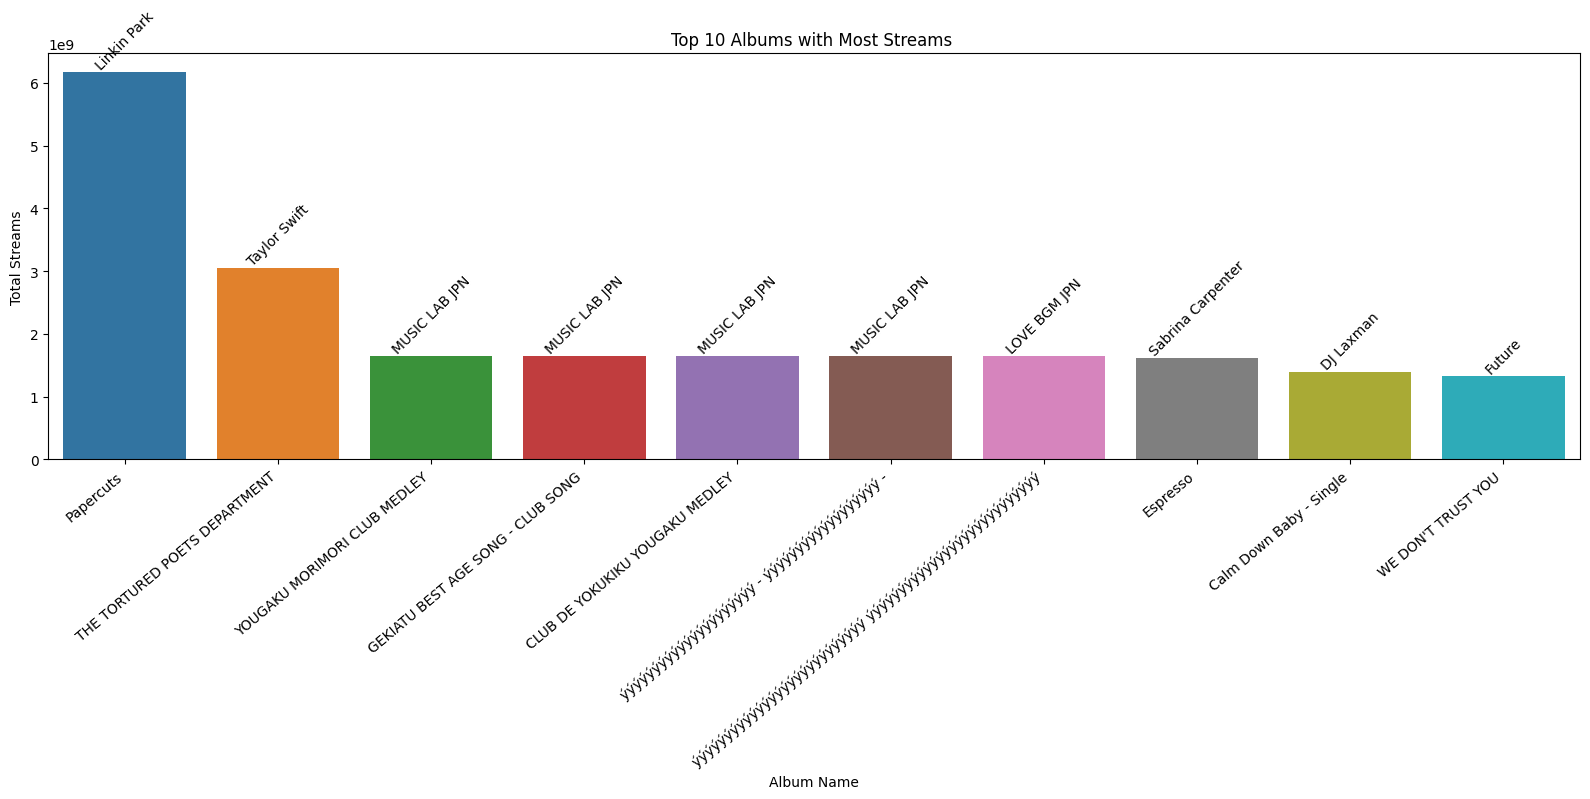

In [32]:
plt.figure(figsize=(16, 8))
artists = album_most_streams['Artist'].to_numpy()
albums = album_most_streams['Album Name'].to_numpy()
total_streams = album_most_streams['Spotify Streams'].to_numpy()
sns.barplot(x=albums, y=total_streams) 
plt.xlabel('Album Name')
plt.ylabel('Total Streams')
plt.title('Top 10 Albums with Most Streams ')
for i, (album, artist, streams) in enumerate(zip(albums, artists, total_streams)):
    plt.text(i, streams + 50, f"{artist}", ha='center', va='bottom', fontsize=10, rotation=45)  
plt.xticks(rotation=40,ha='right')  
plt.tight_layout()
plt.show()

In [33]:
spotify[spotify['Artist']=='MUSIC LAB JPN']

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year,Month
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,9,355.7,1653018119,1,15,92.0,2024,June
22,Danza Kuduro - Cover,CLUB DE YOKUKIKU YOUGAKU MEDLEY,MUSIC LAB JPN,5/21/2024,23,279.0,1655575417,10,655,95.0,2024,May
47,Danza Kuduro - Cover,GEKIATU BEST AGE SONG - CLUB SONG,MUSIC LAB JPN,5/2/2024,48,204.4,1655575417,9,85,83.0,2024,May
58,Danza Kuduro - Cover,YOUGAKU MORIMORI CLUB MEDLEY,MUSIC LAB JPN,4/29/2024,59,190.0,1655575417,1,3,86.0,2024,April


**The four single tracks were also made into four albums for MUSIC LAB JPN** 

In [34]:
artist_most_streams = (spotify.groupby(['Artist'])
                       .agg(Total_Streams=('Spotify Streams', 'sum'), Track_Count=('Track', 'count'))
                       .reset_index()
                       .sort_values(by='Total_Streams', ascending=False).head(10))
artist_most_streams=artist_most_streams.reset_index(drop=True)
print("Artist with the Most Streams:")
artist_most_streams

Artist with the Most Streams:


,Artist,Total_Streams,Track_Count
0,MUSIC LAB JPN,6619744370,4
1,Linkin Park,6195495729,11
2,Taylor Swift,3545613606,24
3,Ariana Grande,2056932352,7
4,ati2x06,1812548791,2
5,Sabrina Carpenter,1681170228,4
6,LOVE BGM JPN,1645079292,1
7,21 Savage,1475807584,10
8,Future,1452788578,15
9,DJ Laxman,1389772733,1


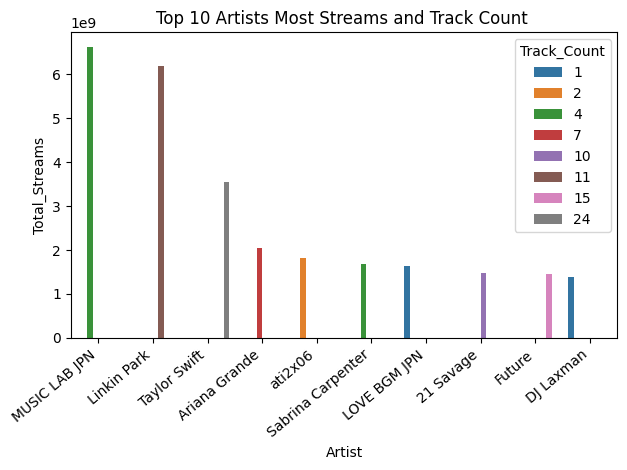

In [35]:
sns.barplot(x='Artist', y='Total_Streams', hue='Track_Count', data=artist_most_streams)
plt.title('Top 10 Artists Most Streams and Track Count ')
plt.xticks(rotation=40, ha='right') 
plt.tight_layout()
plt.show()

In [36]:
track_most_streams = (spotify.groupby(['Artist', 'Track','Release Date','Album Name','Spotify Playlist Count','Spotify Playlist Reach'])['Spotify Streams'].sum().sort_values(ascending=False).reset_index().head(10) )
track_most_streams

,Artist,Track,Release Date,Album Name,Spotify Playlist Count,Spotify Playlist Reach,Spotify Streams
0,Linkin Park,In the End,4/12/2024,Papercuts,97,488602,2045512421
1,MUSIC LAB JPN,Danza Kuduro - Cover,5/21/2024,CLUB DE YOKUKIKU YOUGAKU MEDLEY,10,655,1655575417
2,MUSIC LAB JPN,Danza Kuduro - Cover,5/2/2024,GEKIATU BEST AGE SONG - CLUB SONG,9,85,1655575417
3,MUSIC LAB JPN,Danza Kuduro - Cover,4/29/2024,YOUGAKU MORIMORI CLUB MEDLEY,1,3,1655575417
4,MUSIC LAB JPN,Danza Kuduro - Cover,6/9/2024,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,1,15,1653018119
5,LOVE BGM JPN,Danza Kuduro - Cover,5/14/2024,ýýýýýýýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýý...,0,0,1645079292
6,DJ Laxman,Calm Down Baby,1/12/2024,Calm Down Baby - Single,1,1,1389772733
7,Ben King,Stand by Me,1/5/2024,Don't Play That Song,1,3,1094052047
8,JAY-Z,Numb / Encore,4/12/2024,Papercuts,128,485454,1003215671
9,ati2x06,Lalala,1/17/2024,Lalala - Single,1,124,966112900


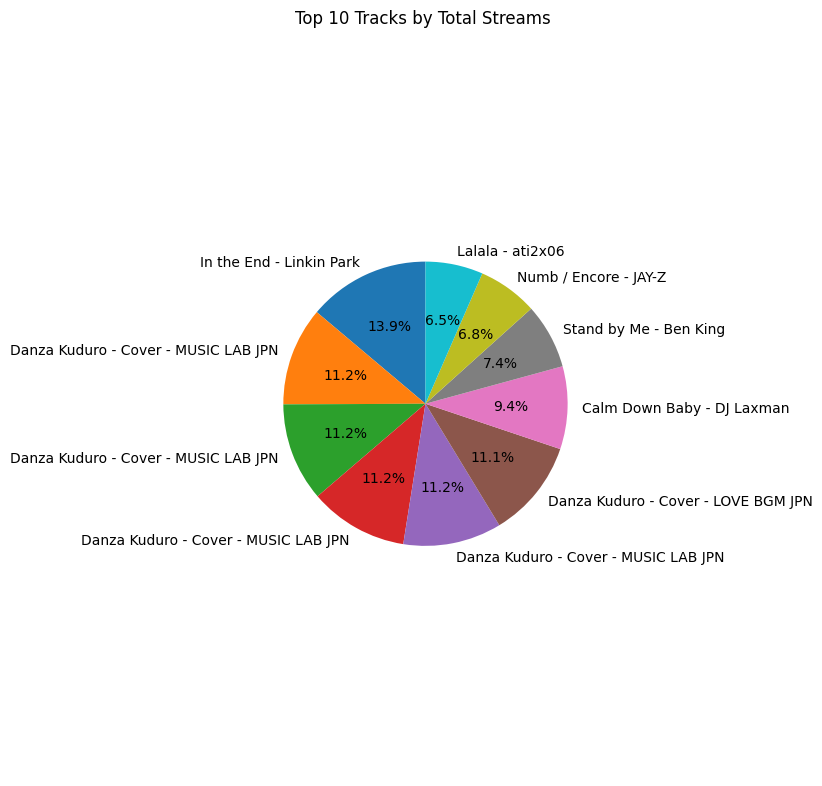

In [37]:
track_titles = track_most_streams['Track'] + ' - ' + track_most_streams['Artist'] 
total_streams = track_most_streams['Spotify Streams'].to_numpy()


plt.figure(figsize=(8, 8))
plt.pie(total_streams, labels=track_titles, autopct='%1.1f%%', startangle=90,counterclock=True) 
plt.title('Top 10 Tracks by Total Streams ')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [38]:
print('The Track Has Most Streams In 2024',track_most_streams.iloc[0][1],'for',track_most_streams.iloc[0][0])

The Track Has Most Streams In 2024 In the End for Linkin Park


In [39]:
month_most_streams = (
    spotify.groupby('Month')
    .agg(Track_Count=('Track', 'count'), Total_Streams=('Spotify Streams', 'sum'))
    .reset_index()
    .sort_values(by='Total_Streams', ascending=False)
)

print("Months with Most Streamed Tracks:")
print(month_most_streams)
print('Spotify has released', month_most_streams.sum().iloc[1],'tracks as of June 9 ')

Months with Most Streamed Tracks:
      Month  Track_Count  Total_Streams
0     April          163    21520352067
4     March          133    12636728962
2   January           72    12244841947
1  February          104    10230772197
5       May          171    10053478538
3      June           45     2711085351
Spotify has released 688 tracks as of June 9 


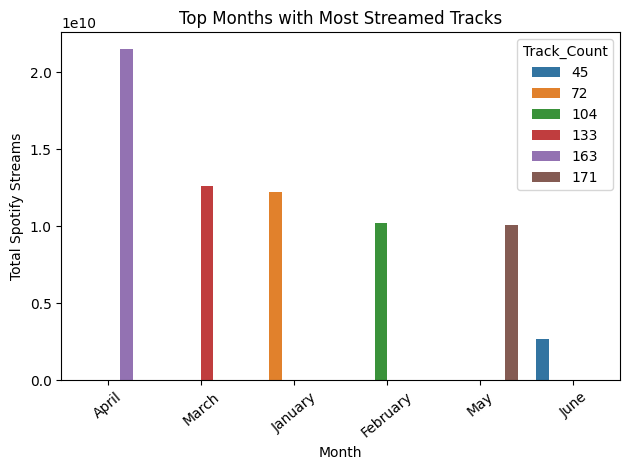

In [40]:
sns.barplot(x='Month', y='Total_Streams',hue = 'Track_Count', data=month_most_streams, dodge=True)
plt.xlabel('Month')
plt.ylabel('Total Spotify Streams')
plt.title('Top Months with Most Streamed Tracks')
plt.xticks(rotation=40)  
plt.tight_layout()
plt.show()

In [41]:
track_most_playlist_count = (spotify.groupby(['Artist', 'Track','Release Date','Album Name','Spotify Streams'])['Spotify Playlist Count'].sum().sort_values(ascending=False).reset_index().head(10) )
track_most_playlist_count

,Artist,Track,Release Date,Album Name,Spotify Streams,Spotify Playlist Count
0,Benson Boone,Beautiful Things,1/18/2024,Beautiful Things,900158751,73118
1,21 Savage,redrum,1/12/2024,american dream,428233003,60125
2,Artemas,i like the way you kiss me,3/19/2024,I like the way you kiss me,601309283,54331
3,ýý$,CARNIVAL,2/8/2024,CARNIVAL,466887055,53842
4,Hozier,Too Sweet,3/22/2024,Unreal Unearth: Unheard,532012790,45953
5,Future,Like That,3/22/2024,WE DON'T TRUST YOU,355186436,43025
6,FloyyMenor,Gata Only,2/2/2024,Gata Only,675079153,40094
7,Beyoncï¿,TEXAS HOLD 'EM,2/10/2024,TEXAS HOLD 'EM,426700979,34044
8,21 Savage,nï¿½ï¿½e,1/10/2024,nï¿½ï¿½e,150203467,33551
9,Tommy Richman,MILLION DOLLAR BABY,4/26/2024,Million Dollar Baby - Single,390470936,30716


In [42]:
track_most_playlist_reach = (spotify.groupby(['Artist', 'Track','Release Date','Album Name','Spotify Streams'])['Spotify Playlist Reach'].sum().sort_values(ascending=False).reset_index().head(10) )
track_most_playlist_reach

,Artist,Track,Release Date,Album Name,Spotify Streams,Spotify Playlist Reach
0,Sabrina Carpenter,Espresso,4/12/2024,Espresso,547882871,262343414
1,Artemas,i like the way you kiss me,3/19/2024,I like the way you kiss me,601309283,211607669
2,FloyyMenor,Gata Only,2/2/2024,Gata Only,675079153,211236940
3,Billie Eilish,BIRDS OF A FEATHER,5/17/2024,HIT ME HARD AND SOFT,214237645,202626837
4,Benson Boone,Beautiful Things,1/18/2024,Beautiful Things,900158751,201585714
5,Hozier,Too Sweet,3/22/2024,Unreal Unearth: Unheard,532012790,198241377
6,Ariana Grande,we can't be friends (wait for your love),3/8/2024,eternal sunshine,591068364,197494995
7,Billie Eilish,LUNCH,5/17/2024,HIT ME HARD AND SOFT,221636195,197280692
8,Tommy Richman,MILLION DOLLAR BABY,4/26/2024,Million Dollar Baby - Single,390470936,196631588
9,Shaboozey,A Bar Song (Tipsy),4/12/2024,A Bar Song (Tipsy),311928522,184685163


In [43]:
correlation = spotify['Spotify Streams'].corr(spotify['Spotify Playlist Count'])
stream_variance = spotify['Spotify Streams'].var()
playlist_variance = spotify['Spotify Playlist Count'].var()
print("Variance of Spotify Streams:", stream_variance)
print("Variance of Spotify Playlist Count:", playlist_variance)
print(correlation)

Variance of Spotify Streams: 4.65813842211863e+16
Variance of Spotify Playlist Count: 50139288.49550626
0.2203913519279487


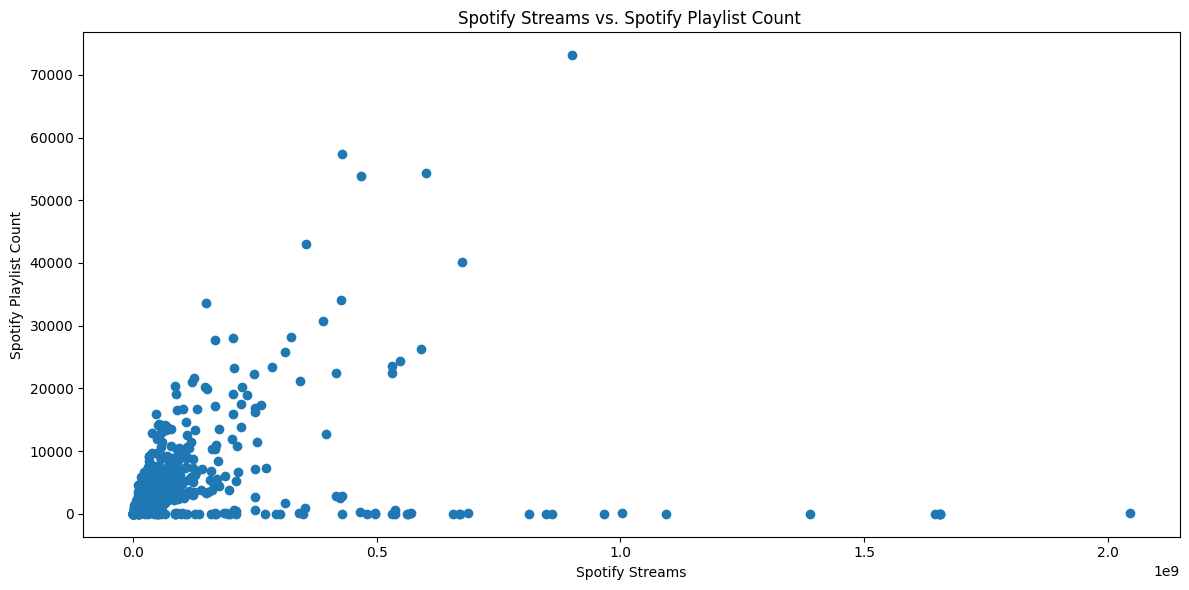

In [44]:
plt.figure(figsize=(12, 6))
plt.scatter(spotify['Spotify Streams'], spotify['Spotify Playlist Count'])
plt.xlabel('Spotify Streams')
plt.ylabel('Spotify Playlist Count')
plt.title('Spotify Streams vs. Spotify Playlist Count ')
plt.tight_layout()
plt.show()

In [45]:
correlation = spotify['Spotify Streams'].corr(spotify['Spotify Playlist Reach'])
stream_variance = spotify['Spotify Streams'].var()
playlist_variance = spotify['Spotify Playlist Reach'].var()
print("Variance of Spotify Streams:", stream_variance)
print("Variance of Spotify Playlist Reach:", playlist_variance)
print(correlation)

Variance of Spotify Streams: 4.65813842211863e+16
Variance of Spotify Playlist Reach: 1531928398715780.0
0.15614324995433213


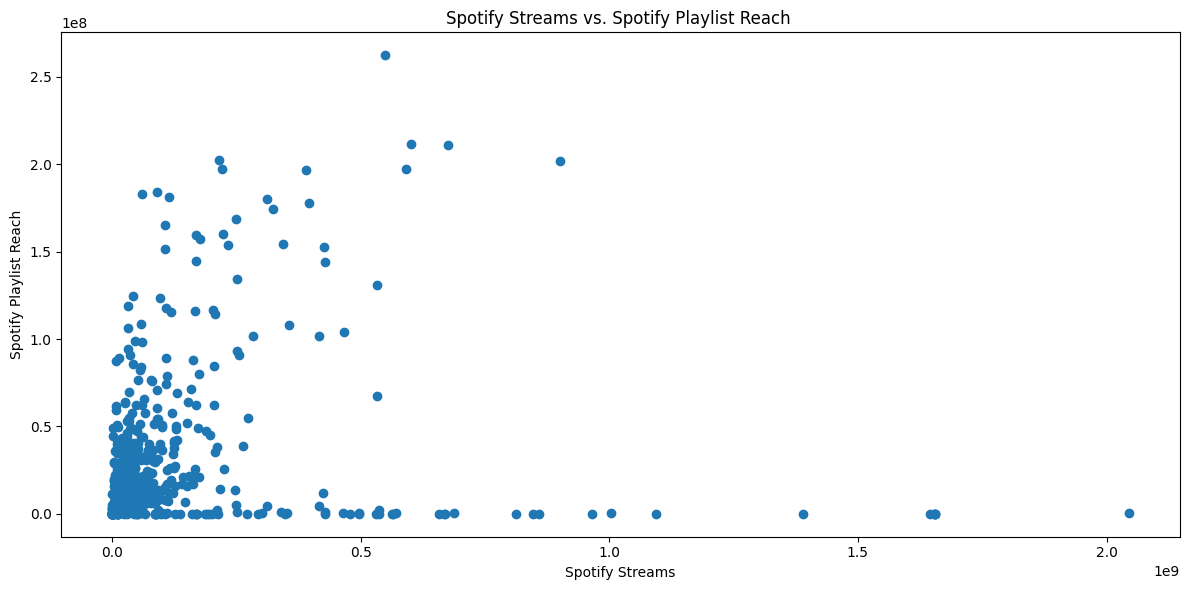

In [46]:
 plt.figure(figsize=(12, 6))
plt.scatter(spotify['Spotify Streams'], spotify['Spotify Playlist Reach'])
plt.xlabel('Spotify Streams')
plt.ylabel('Spotify Playlist Reach')
plt.title('Spotify Streams vs. Spotify Playlist Reach ')
plt.tight_layout()
plt.show()

<Axes: xlabel='Spotify Streams'>

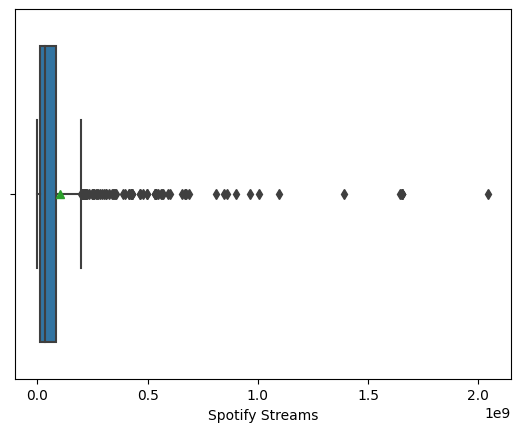

In [47]:
sns.boxplot(
    x = "Spotify Streams",
    showmeans=True,  # Show mean 
    data=spotify
)


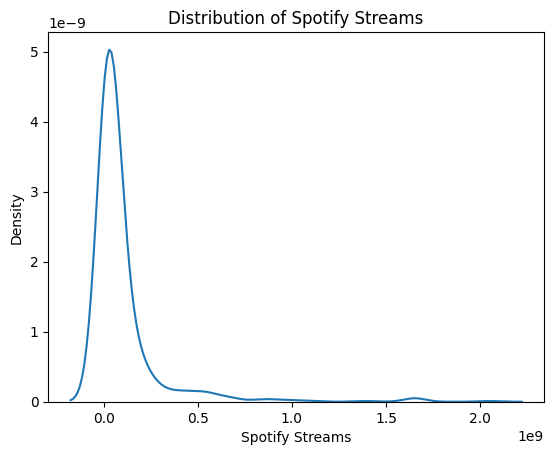

In [48]:
sns.kdeplot(spotify["Spotify Streams"])
plt.xlabel('Spotify Streams')
plt.ylabel('Density')
plt.title('Distribution of Spotify Streams')
plt.show()

 ****I hope I covered all aspects Dont forget to upvote****

**I have analyzed 2024**

# **Some conclusions¶**

**1- Spotify is the most popular platform to release songs on, as it achieves the highest listening rates**

**2- Taylor Swift is the most released song on the Spotify platform in 2024, as she released two albums consisting of 24 tracks and reached more than 3 billion listeners on Spotify.**

**3- The most followed album on Spotify in 2024 was Papercuts by Linkin Park, with more than 6 billion listeners.**

**4- The most listened to track on Spotify was also by the artist Linkin Park, which is In the End, and it reached more than 2 billion listeners.**

**5- The platform is doing a wonderful job in terms of increasing the issuance of tracks, which leads to an increase in listening rates for the platform because since the beginning of January it has witnessed a 30% increase in issuance.**

**6- MUSIC LAB JPN is the most listened to single track in 2024, as he released 4 tracks, reaching 6 billion listeners, as he is the best person to cover songs and his style is trendy.**

****What you did to modify the data****

**1-I knew which columns I would be working on and which had missing values ​​that would be difficult to replace and deleted it** 

**2-I collected data for the year 2024 to know how to work on it**

**3- I processed the missing values ​​in Spotify Popularity by adding the value that precedes it to the missing values**

**4- I had 5 missing values ​​for the artists and I searched for the album, so each artist has more than one album, but they are all single tracks and it is also unknown which streams they have, so I deleted them.**

**5- Then I converted three columns of Object to Float so that I could deal with the data, and I also made the Float values ​​0 to make them numbers other than Float.**

**6-After that, I collected the data while collecting the data 
I found that any single track released by Spotify is counted as a track from an album, and this is what made 21 Savage the most album releases with 6 in number of album releases consisting of 5 tracks and 5 single tracks.**